In [53]:
from event_generator import Events

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
def plot(events):
    fig, ax = plt.subplots(figsize=(20,1))
    plt.plot(events, np.zeros_like(events), 'or', marker='|', markersize=15)
    xfmt = mdates.DateFormatter('%d-%m-%y %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    ax.set_yticklabels([])
    plt.grid()
#     plt.savefig("example1.png", bbox_inches='tight')
    plt.show()

In [27]:
def sin_signal(t, period1, period2, phase=0, m=0.3):
    period = period1 + period2
    return 1-m*(1-np.sin(2*np.pi*t/period+phase))

def pulse_wave(t, period1, period2, phase=0):
    return (t-phase)%(period1+period2)>period1

def one(t, *args):
    return 1

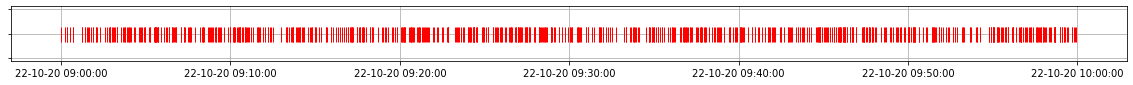

In [5]:
a = Events(1/5, [['2020-10-22 09:00:00.000000','2020-10-22 10:00:00.000000']], one, 23, 50)
plot(a.events)
evnts = np.array(a.events_in_seconds)

# Проверка пуассоновости событий

Времена между событиями подчиняются экспоненциальному распределению $Exp(\lambda)$

Для $Exp(\lambda)\;\;$: $\displaystyle\mathbb{E}[X^n]=\frac{n!}{\lambda^n}$

$\displaystyle\lambda_n=\sqrt[n]{\frac{n!}{\mathbb{E}[X^n]}}$


In [9]:
import random
from IPython.display import HTML, display
import tabulate
from event_generator import Check_Poissoness

m0 = []
m1 = []
m2 = []
m3 = []
for n in range(5):
    m = random.random()*100
    a = Events(1/5, [['2020-10-22 08:15:27.243860','2020-10-22 08:27:00.713311']], one, 300, 100)
    l0, l1, l2, l3 = Check_Poissoness(a)
    m0.append(l0)
    m1.append(l1)
    m2.append(l2)
    m3.append(l3)

table = [["m", *m0],
         ["$\lambda_1$",*m1],
         ["$\lambda_2$",*m2],
         ["$\lambda_3$",*m3]]
table = map(list, zip(*table)) #транспонирование
display(HTML(tabulate.tabulate(table, tablefmt='html')))

m,$\lambda_1$,$\lambda_2$,$\lambda_3$
0.2,0.28900365997257416,0.32439061582686013,0.3602023683771072
0.2,0.24936981473233275,0.27953614922640013,0.31266534162982884
0.2,0.24108542053984383,0.26959665869901006,0.2991159601912476
0.2,0.3136190291756415,0.3513545984022633,0.3915082996302802
0.2,0.27293741380981745,0.3171759292083567,0.3599632279479729


# Pulse wave

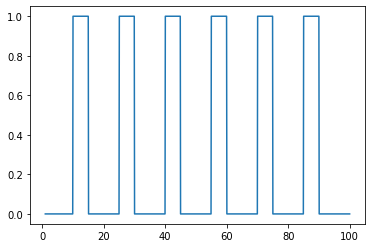

In [50]:
x = np.linspace(1, 100, 1000)
plt.plot(x, pulse_wave(x, 10, 5))
plt.show()

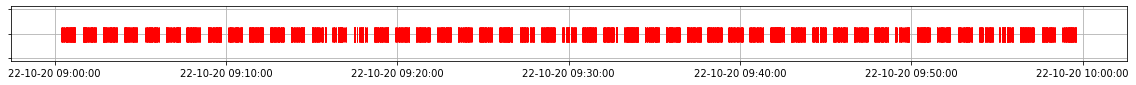

In [51]:
a = Events(1, [['2020-10-22 09:00:00.000000','2020-10-22 10:00:00.000000']], pulse_wave, 23, 50)
plot(a.events)
evnts = np.array(a.events_in_seconds)

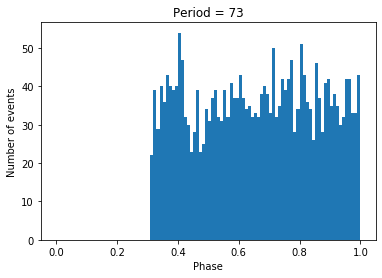

In [52]:
period = 73
n, bins, patches = plt.hist(evnts%period/period, 100, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

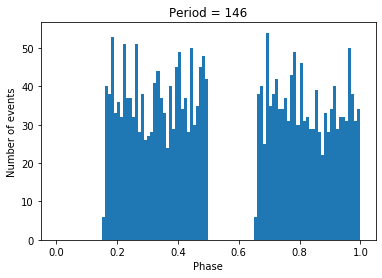

In [46]:
period = 2*73
n, bins, patches = plt.hist(evnts%period/period, 100, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

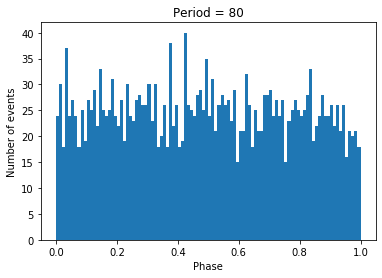

In [47]:
period = 80
n, bins, patches = plt.hist(evnts%period/period, 100, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()


# Сигнал сложной формы

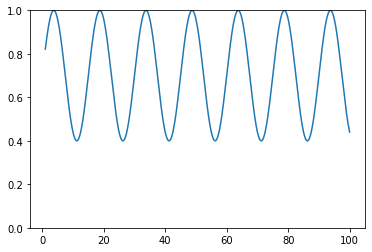

In [18]:
x = np.linspace(1, 100, 1000)
plt.plot(x, sin_signal(x, 10, 5))
plt.ylim(0, 1)
plt.show()

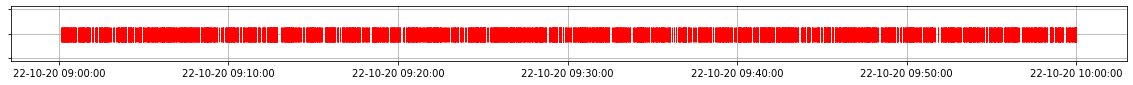

In [24]:
a = Events(1, [['2020-10-22 09:00:00.000000','2020-10-22 10:00:00.000000']], sin_signal, 23, 50)
plot(a.events)
evnts = np.array(a.events_in_seconds)

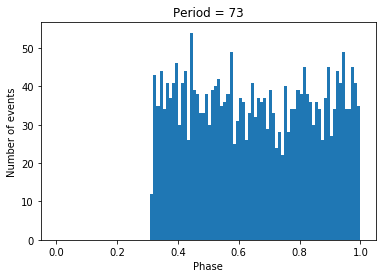

In [48]:
period = 73
n, bins, patches = plt.hist(evnts%period/period, 100, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

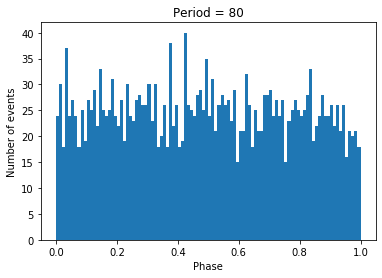

In [49]:
period = 80
n, bins, patches = plt.hist(evnts%period/period, 100, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()
